In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("../data/online_retail.csv", dtype={'CustomerID': str,'InvoiceID': str}, encoding="ISO-8859-1")
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format="%m/%d/%Y %H:%M")

In [3]:
df = df.dropna()
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


In [4]:
df['Description'].tolist()

['WHITE HANGING HEART T-LIGHT HOLDER',
 'WHITE METAL LANTERN',
 'CREAM CUPID HEARTS COAT HANGER',
 'KNITTED UNION FLAG HOT WATER BOTTLE',
 'RED WOOLLY HOTTIE WHITE HEART.',
 'SET 7 BABUSHKA NESTING BOXES',
 'GLASS STAR FROSTED T-LIGHT HOLDER',
 'HAND WARMER UNION JACK',
 'HAND WARMER RED POLKA DOT',
 'ASSORTED COLOUR BIRD ORNAMENT',
 "POPPY'S PLAYHOUSE BEDROOM ",
 "POPPY'S PLAYHOUSE KITCHEN",
 'FELTCRAFT PRINCESS CHARLOTTE DOLL',
 'IVORY KNITTED MUG COSY ',
 'BOX OF 6 ASSORTED COLOUR TEASPOONS',
 'BOX OF VINTAGE JIGSAW BLOCKS ',
 'BOX OF VINTAGE ALPHABET BLOCKS',
 'HOME BUILDING BLOCK WORD',
 'LOVE BUILDING BLOCK WORD',
 'RECIPE BOX WITH METAL HEART',
 'DOORMAT NEW ENGLAND',
 'JAM MAKING SET WITH JARS',
 'RED COAT RACK PARIS FASHION',
 'YELLOW COAT RACK PARIS FASHION',
 'BLUE COAT RACK PARIS FASHION',
 'BATH BUILDING BLOCK WORD',
 'ALARM CLOCK BAKELIKE PINK',
 'ALARM CLOCK BAKELIKE RED ',
 'ALARM CLOCK BAKELIKE GREEN',
 'PANDA AND BUNNIES STICKER SHEET',
 'STARS GIFT TAPE ',
 'INFLATAB

In [5]:
'''텍스트만 추출'''
import collections

corpus = " ".join(df['Description'].tolist()).split(" ")
count = collections.Counter(corpus)
print(count)

Counter({'': 104215, 'SET': 41623, 'OF': 41479, 'BAG': 38452, 'RED': 32590, 'HEART': 29443, 'RETROSPOT': 27029, 'VINTAGE': 26043, 'DESIGN': 24007, 'PINK': 20521, 'CHRISTMAS': 19334, 'BOX': 18359, 'CAKE': 16630, 'WHITE': 16360, 'METAL': 15897, 'JUMBO': 15737, 'LUNCH': 15211, '3': 15040, 'BLUE': 14044, 'HANGING': 13220, 'HOLDER': 12975, 'SIGN': 12795, 'PACK': 12144, 'T-LIGHT': 11531, 'PAPER': 10845, 'SMALL': 10592, 'WOODEN': 10183, '6': 9782, 'CASES': 9655, 'CARD': 9621, 'GLASS': 8997, '12': 8958, 'TEA': 8957, 'POLKADOT': 8937, 'DECORATION': 8792, 'SPACEBOY': 8713, 'BOTTLE': 8703, 'IN': 8563, 'AND': 8015, 'HOT': 8005, 'HOME': 8001, 'PANTRY': 7760, 'LARGE': 7691, 'TIN': 7640, 'WATER': 7625, 'REGENCY': 7195, 'WITH': 7145, 'CERAMIC': 7109, '4': 6886, 'DOORMAT': 6847, 'PAISLEY': 6711, 'DOLLY': 6699, 'IVORY': 6678, 'CREAM': 6564, 'BUNTING': 6346, 'ROSE': 6329, 'GREEN': 6307, 'MUG': 6304, 'FELTCRAFT': 6298, 'WRAP': 6247, 'GIRL': 6206, 'ASSORTED': 6168, 'MINI': 6113, 'CLOCK': 6059, 'LOVE': 5970

In [10]:
!pip install pytagcloud pygame simplejson

     ------------------------------------- 754.7/754.7 kB 15.8 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     --------------------------------------- 10.8/10.8 MB 19.3 MB/s eta 0:00:00
     ---------------------------------------- 75.5/75.5 kB 4.3 MB/s eta 0:00:00
  Created wheel for pytagcloud: filename=pytagcloud-0.3.5-py3-none-any.whl size=759879 sha256=c48ef15cf752dc73c6fd71459f1244edafb83918dbdea1003b38251b69ec7362
  Stored in directory: c:\users\connie\appdata\local\pip\cache\wheels\77\50\a4\dbd4b0c5175da72ed028b680270c079d7c8d948320a859a727
Successfully built pytagcloud


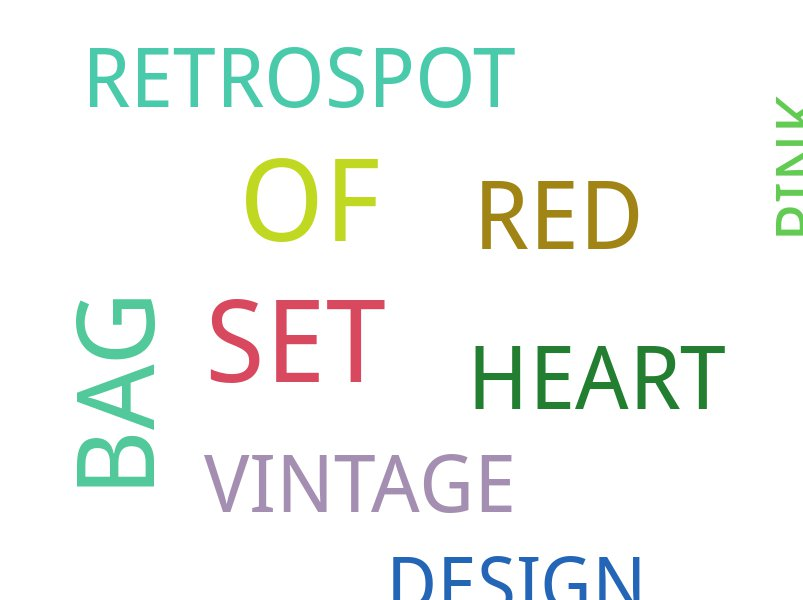

In [12]:
import random
import pytagcloud
import webbrowser

ranked_tags = count.most_common(10)
taglist = pytagcloud.make_tags(ranked_tags, maxsize=200)
pytagcloud.create_tag_image(taglist, 'wordcloud_example.jpg', 
                            size=(900, 600),
                            rectangular=False)

from IPython.display import Image
Image(filename='wordcloud_example.jpg')